In [50]:
import pandas as pd
import sys
import time
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pprint import pprint

from collections import Counter 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

plt.rcParams["figure.figsize"] = (20,15)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangkaimin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wangkaimin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv("philosophy_data.csv")

In [3]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [4]:
tok=df[['school', 'tokenized_txt']]

In [5]:
print(type(df))
print(type(tok))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
df.school.unique()

array(['plato', 'aristotle', 'empiricism', 'rationalism', 'analytic',
       'continental', 'phenomenology', 'german_idealism', 'communism',
       'capitalism', 'stoicism', 'nietzsche', 'feminism'], dtype=object)

In [7]:
names = df.school.unique()

## plato as example

In [8]:
plato = tok[tok['school'] == "plato"]
plato.head()

,school,tokenized_txt
0,plato,"['what', 'new', 'socrates', 'to', 'make', 'you..."
1,plato,"['surely', 'you', 'are', 'not', 'prosecuting',..."
2,plato,"['the', 'athenians', 'do', 'not', 'call', 'thi..."
3,plato,"['what', 'is', 'this', 'you', 'say']"
4,plato,"['someone', 'must', 'have', 'indicted', 'you',..."


In [9]:
# Number of sentences for plato
len(plato)

38366

In [10]:
# extract actual string vals
all_words = []
for entry in plato.iterrows():  # Iterate over all entries
    for word in literal_eval(entry[1].tokenized_txt):  # Iterate over all words
        all_words.append(word)

In [11]:
word_counts = Counter(all_words) 
top_ten = word_counts.most_common(10) 

In [12]:
top_ten

[('the', 41638),
 ('and', 28361),
 ('to', 26147),
 ('of', 24212),
 ('that', 17785),
 ('is', 15446),
 ('in', 14268),
 ('it', 13698),
 ('you', 11303),
 ('be', 8793)]

In [13]:
# As we can see top ten contains most of the stop words. Let's remove them
stop_words = set(stopwords.words('english'))
all_words_wo_stop_words = []
for word in all_words:
    if (word not in stop_words):
        all_words_wo_stop_words.append(word)

In [14]:
# Let's just extract all adjectives
is_adj = lambda pos: pos[:2] == 'JJ'
adjs = [word for (word, pos) in nltk.pos_tag(all_words_wo_stop_words) if is_adj(pos)] 


In [15]:
word_counts = Counter(adjs) 
top_ten = word_counts.most_common(10) 
top_ten

[('good', 2214),
 ('many', 1129),
 ('true', 783),
 ('different', 754),
 ('bad', 718),
 ('right', 642),
 ('first', 578),
 ('whole', 572),
 ('possible', 533),
 ('great', 495)]

### wordcloud

(-0.5, 399.5, 199.5, -0.5)

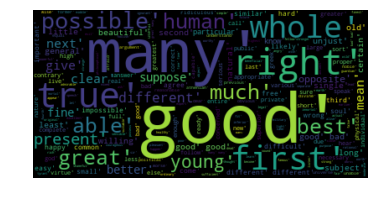

In [16]:
# Generate a word cloud image
wordcloud = WordCloud().generate(str(adjs))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## For all schools

# processing

In [36]:
wcs = {}
top_tens = {}
for name in names:
    print(name)
    school_df = tok[tok['school'] == name]
    all_words = []
    for entry in school_df.iterrows():  # Iterate over all entries
        for word in literal_eval(entry[1].tokenized_txt):  # Iterate over all words
            all_words.append(word)
            
    # As we can see top ten contains most of the stop words. Let's remove them
    stop_words = set(stopwords.words('english'))
    all_words_wo_stop_words = []
    for word in all_words:
        if (word not in stop_words):
            all_words_wo_stop_words.append(word)
    
    is_adj = lambda pos: pos[:2] == 'JJ'
    adjs = [word for (word, pos) in nltk.pos_tag(all_words_wo_stop_words) if is_adj(pos)] 
    word_counts = Counter(adjs) 
    top_ten = word_counts.most_common(10)
    top_tens[name] = top_ten
    wordcloud = WordCloud().generate(str(adjs))
    wcs[name] = wordcloud


plato
aristotle
empiricism
rationalism
analytic
continental
phenomenology
german_idealism
communism
capitalism
stoicism
nietzsche
feminism


In [37]:
i = 0

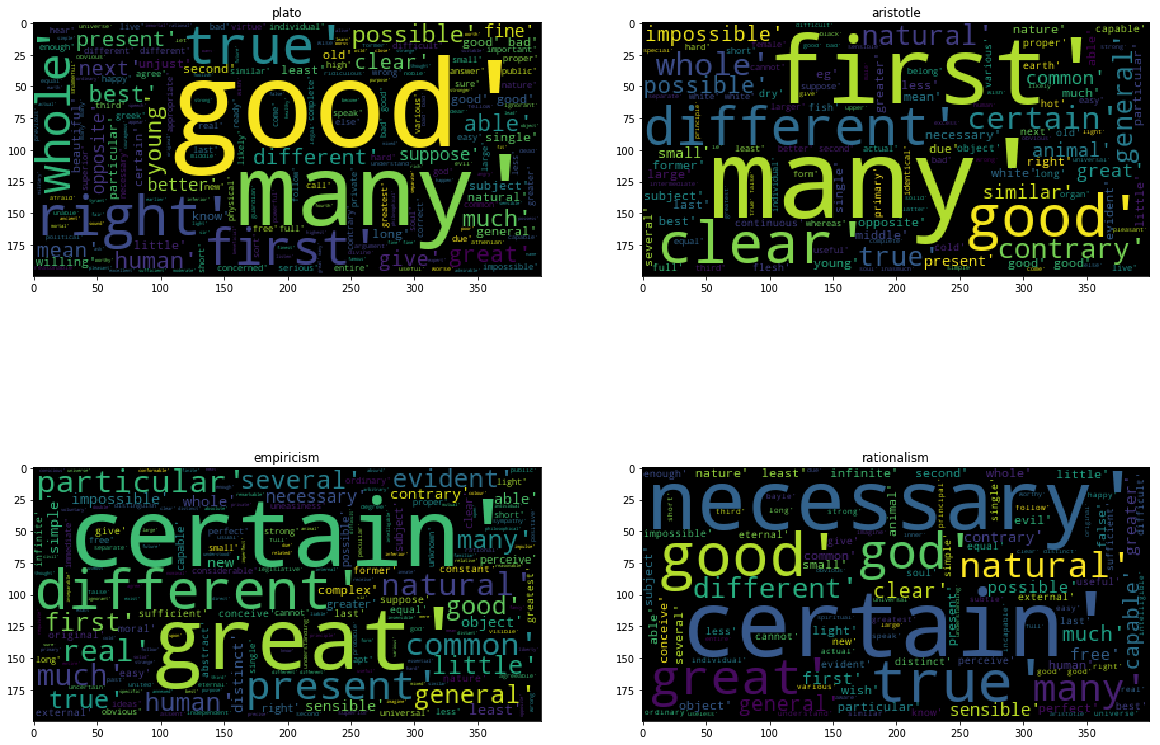

In [38]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].imshow(wcs[names[i]])
axis[0, 0].set_title(names[i])
i += 1
axis[0, 1].imshow(wcs[names[i]])
axis[0, 1].set_title(names[i])

i += 1
axis[1, 0].imshow(wcs[names[i]])
axis[1, 0].set_title(names[i])

i += 1
axis[1, 1].imshow(wcs[names[i]])
axis[1, 1].set_title(names[i])

plt.show()

i += 1

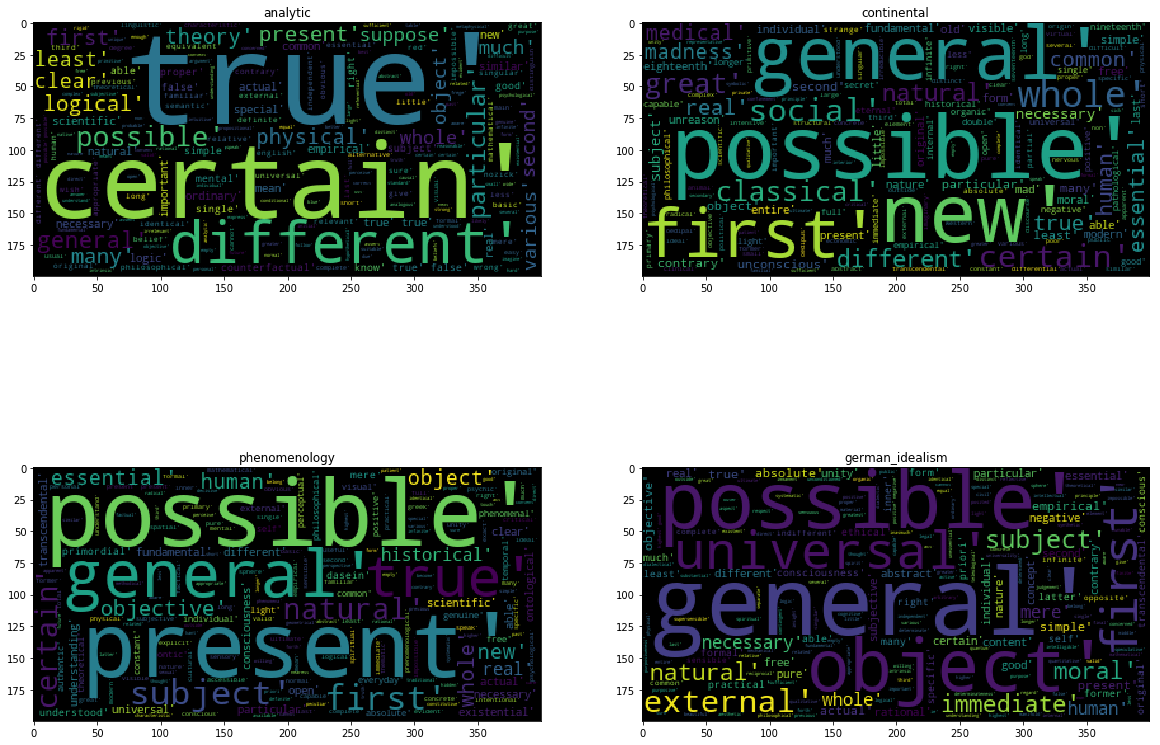

In [39]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].imshow(wcs[names[i]])
axis[0, 0].set_title(names[i])
i += 1
axis[0, 1].imshow(wcs[names[i]])
axis[0, 1].set_title(names[i])

i += 1
axis[1, 0].imshow(wcs[names[i]])
axis[1, 0].set_title(names[i])

i += 1
axis[1, 1].imshow(wcs[names[i]])
axis[1, 1].set_title(names[i])

plt.show()

i += 1

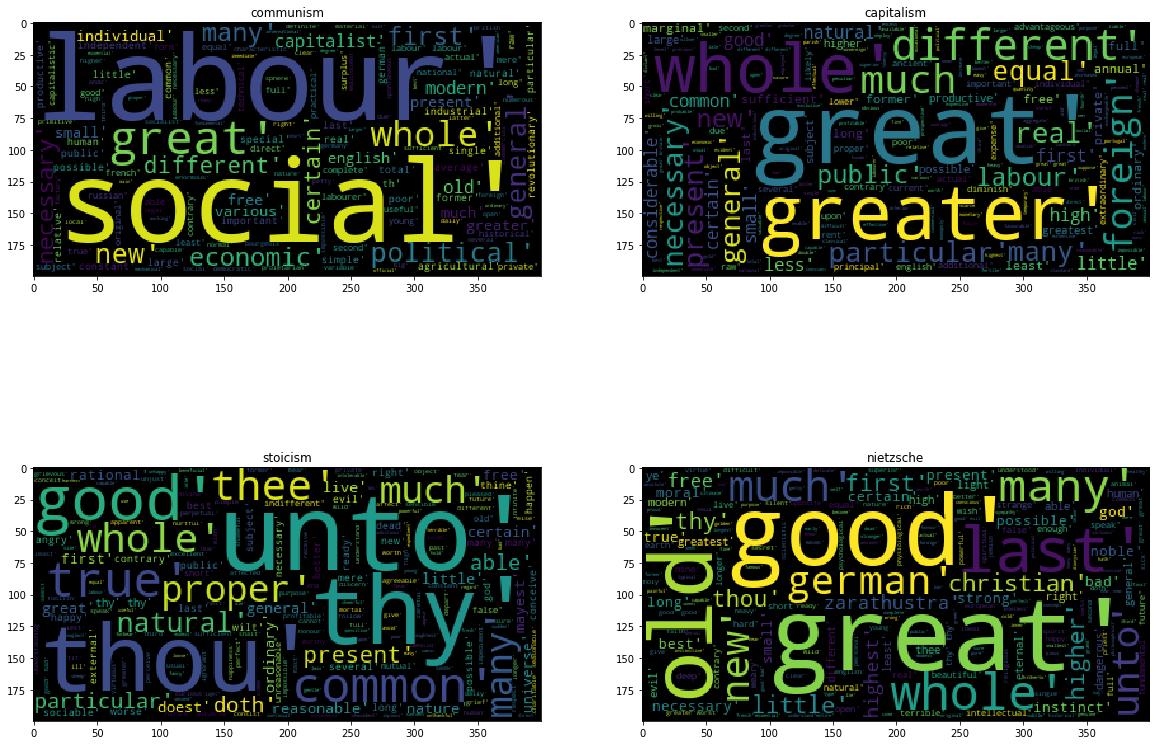

In [40]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].imshow(wcs[names[i]])
axis[0, 0].set_title(names[i])
i += 1
axis[0, 1].imshow(wcs[names[i]])
axis[0, 1].set_title(names[i])

i += 1
axis[1, 0].imshow(wcs[names[i]])
axis[1, 0].set_title(names[i])

i += 1
axis[1, 1].imshow(wcs[names[i]])
axis[1, 1].set_title(names[i])

plt.show()

i += 1

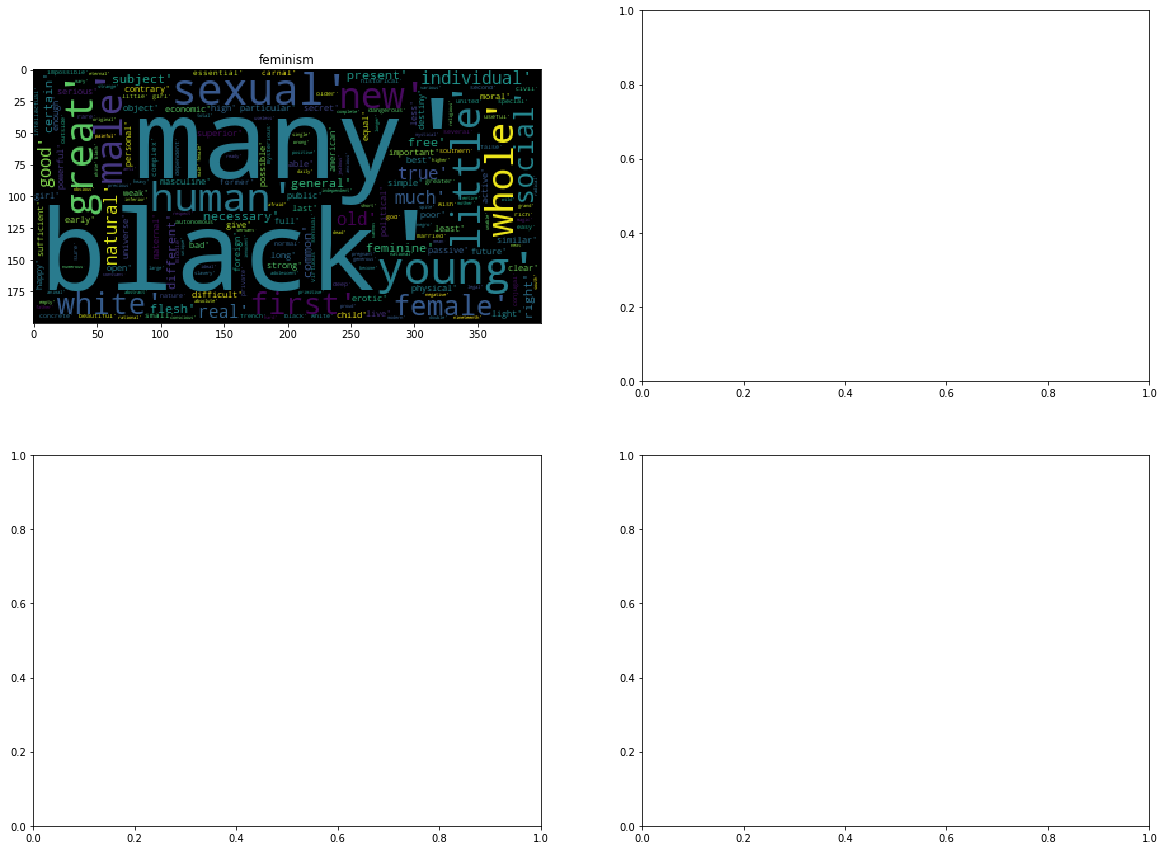

In [41]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

axis[0, 0].imshow(wcs[names[i]])
axis[0, 0].set_title(names[i])
plt.show()

i += 1

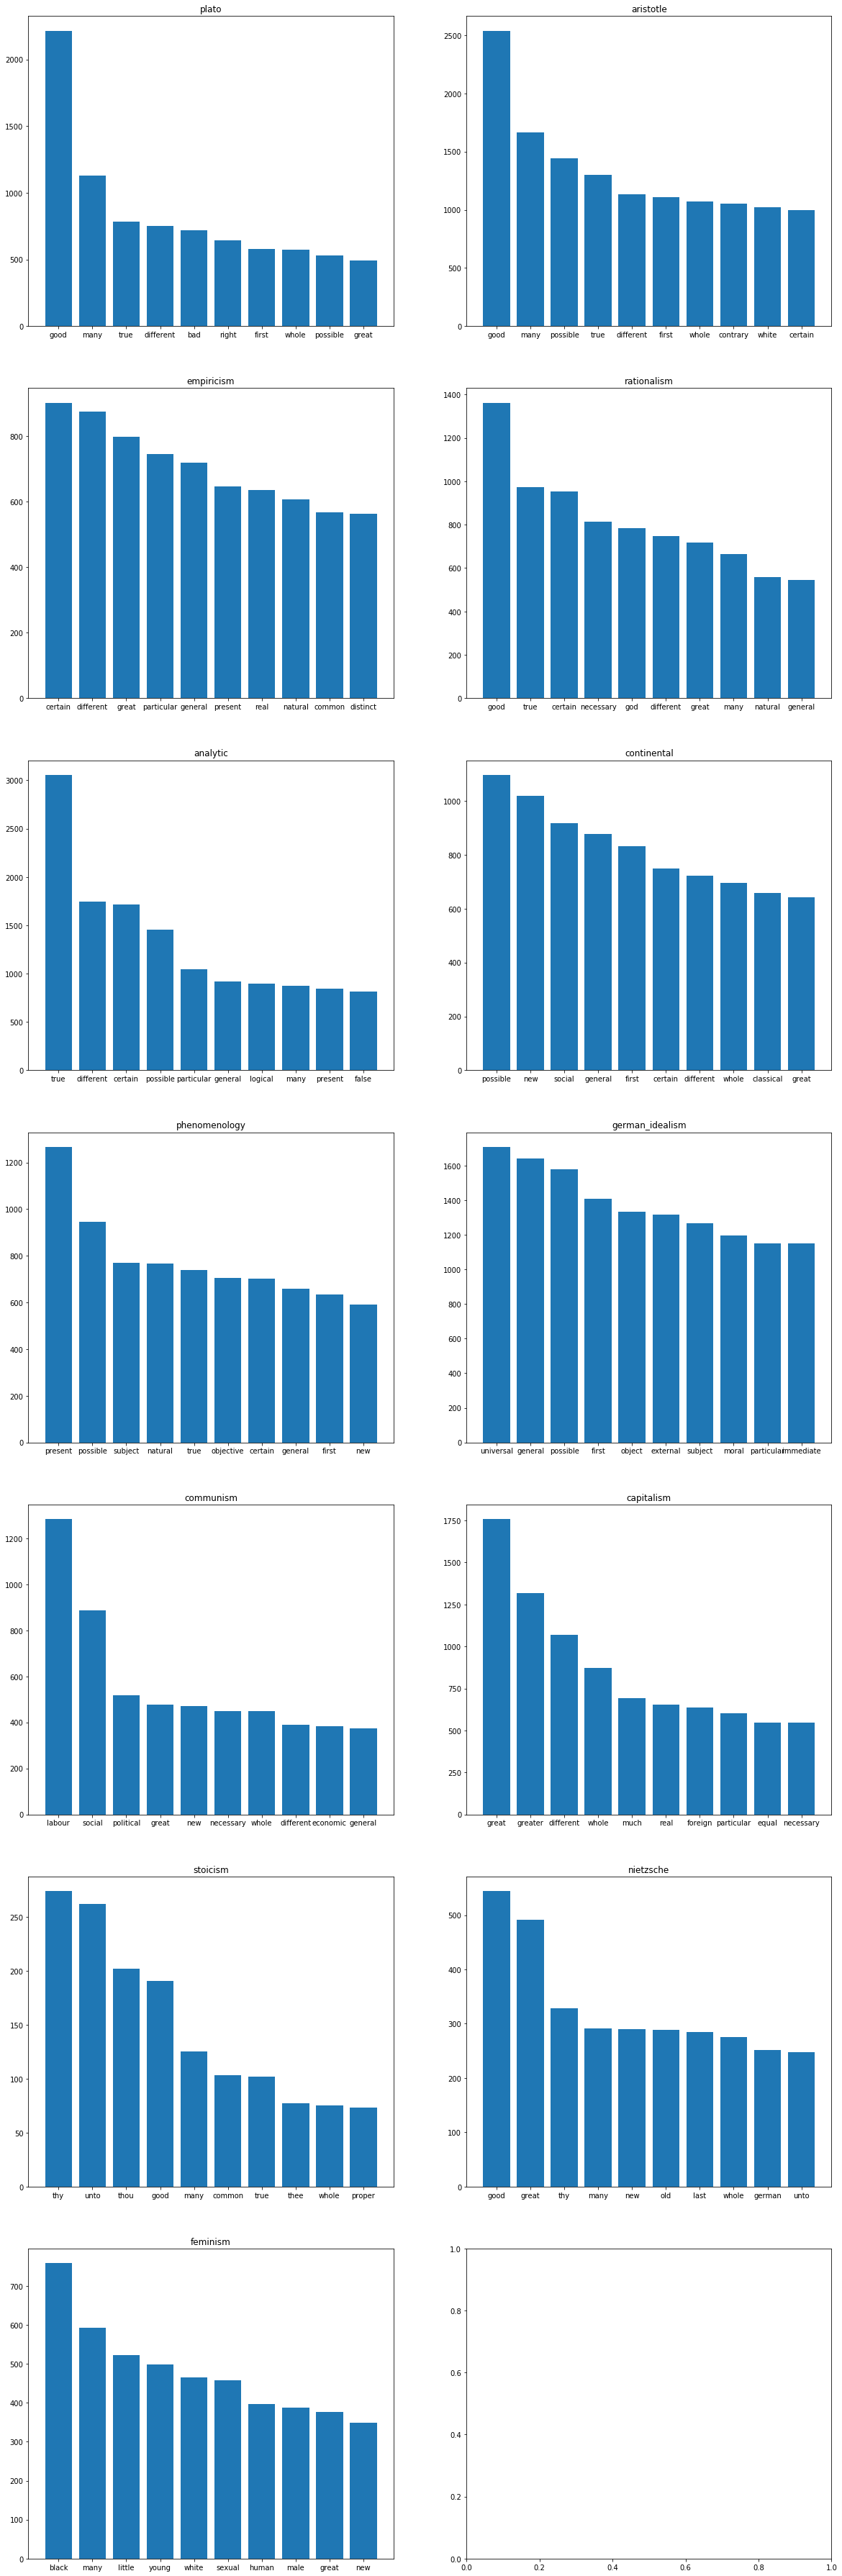

In [76]:
# Initialise the subplot function using number of rows and columns

plt.rcParams["figure.figsize"] = (20,65)
i = 0
figure, axis = plt.subplots(7, 2)
for name in names:
    x = list(map(lambda x: x[0], top_tens[name]))
    y = list(map(lambda x: x[1], top_tens[name]))
    axis[int(i / 2), int(i % 2)].bar(x, y)
    axis[int(i / 2), int(i % 2)].set_title(name)
    i += 1
    
plt.show()


In [49]:
count = 0
for i in (df[df['school'] == "feminism"]).iterrows():
    count = count + 1
    if "black" in i[1].sentence_spacy:
        print(i[1].sentence_spacy)
        print(count)

In short, if it be not considered as the history of man; and not of particular men, who filled a niche in the temple of fame, and dropped into the black rolling stream of time, that silently sweeps all before it, into the shapeless void called eternity.
1960
So far is the first inclination carried, that even the hellish yoke of slavery cannot stifle the savage desire of admiration which the black heroes inherit from both their parents, for all the hardly earned savings of a slave are commonly expended in a little tawdry finery.
2463
Matter too soft a lasting mark to bear, And best distinguish'd by black, brown, or fair.
2483
But conceptualism has lost ground: biological and social sciences no longer believe there are immutably determined entities that define given characteristics like those of the woman, the Jew, or the black; science considers characteristics as secondary reactions to a situation.
2583
To reject the notions of the eternal feminine, the black soul, or the Jewish charac

But stuffed with potatoes lying side by side without touching, its black claws planted in the embers, the cauldron laid tubers for us white as snow, burning hot, flaky.
10731
In Lettres Fran oise mari (Letters to Fran oise, Married), Marcel Pr vost describes the young woman's dismay upon her return from her honeymoon: She thinks of her mother's apartment with its Napoleon and MacMahon furniture, its plush velvet, its wardrobes in black plum wood, everything she judged so old fashioned, so ridiculous
10927
To tear her husband from a worrying rival, she will take him on a trip, she will try to distract him; if necessary following Mme de Pompadour's model she will seek out another, less dangerous rival; if nothing succeeds, she will resort to crying, nervous fits, suicide attempts, and such; but too many scenes and recriminations will chase her husband from the house; the wife will make herself unbearable just when she most needs to seduce; if she wants to win her hand, she will skillfull

Slim, dark girls, wild and beautiful with wrinkled hair, wept silently; young women, black, tawny, white and golden, lifted shivering hands, and old and broken mothers, black and gray, raised great voices and shouted to God across the fields and up to the rocks and the mountains.
16732
In the past ten years over a thousand black men and women and children have met this violent death at the hands of a white mob.
16933
But in every state save one, there are more educated white women than all the illiterate voters, white and black, native and foreign.
16942
The men of Kansas in their speeches would say, '… if negro suffrage passes, we will be flooded with ignorant, impoverished blacks from every State of the Union.
16954
During his trip South, they told McKinley, you preached patience, industry, moderation to your long suffering black fellow citizens, and patriotism, jingoism and imperialism to your white ones.
17018
Washington's theory of vocational education for Black people may have be